## <font color=blue> Stats507-001 , WI 2019</font>
### Zizhao Zhang
#### zizhaoz@umich.edu
***

Time spent on problems(hours):   Problem 1:  0.15    Problem 2:                       Problem 3:
***

Persons discussed idea about: No one

In [124]:
#####################
###Tab Completion:###
#####################
%config IPCompleter.greedy=True

### Problem 1: Warm up: Defining Simple Functions (2 points)

### 1.1:
Define a function called *say_hello* , which takes no arguments and prints the string
*Hello, world!* when called.

In [1]:
def say_hi():
    print("Hello, world!")

In [2]:
say_hi()

Hello, world!


### 1.2:
Define a function called *goat_pad*, which takes a string as its only argument, and
prints that string, prepended and appended with the string goat.

In [85]:
def goat_pad(string):
    if type(string) == str:
        print("goat"+string+"goat")
    else: 
        print("please input a string")
        

In [86]:
goat_pad("good")

goatgoodgoat


In [87]:
goat_pad("_")

goat_goat


### 1.3:
Define a function called *print_n*, which takes two arguments, a string s and an
integer n (in that order), and prints the string n times, each on a separate line. You
may assume that s is a string and that the integer n is non-negative, so there is no
need to perform any error checking in your function.

In [91]:
def print_n(s,n):
    if type(s) == str and type(n) == int and n >= 0:
        print(((s + "\n")*n)[:-1])  

In [90]:
print_n("hello",6)

hello
hello
hello
hello
hello
hello


### Problem 2: Euclid’s algorithm (2 points)

### 2.1: 
The Wikipedia page above includes several pseudocode implementations of Euclid’s
algorithm. Choose one of these, and use it to implement a function *gcd*, which takes
two integers as its arguments and returns their GCD. You may assume that both
inputs are integers, so there is no need to include any error checking in your function.
***
*reference :* https://en.wikipedia.org/wiki/Euclidean_algorithm

In [94]:
def gcd(a,b):
    if b == 0:
        return a 
    else:
        return gcd(b, a%b)

In [96]:
gcd(2,10)

2

### 2.2: 
Use your function to evaluate the GCDs of the following pairs of numbers:

(a) 2018, 2019

(b) 1200, 300

(c) 5040, 60

In [10]:
for i in [[2018,2019],[1200,300],[5040,60]]:
    print("The common greatest divisor of"+str(tuple(i))+" is "+ str(gcd(i[0],i[1])))

The common greatest divisor of(2018, 2019) is 1
The common greatest divisor of(1200, 300) is 300
The common greatest divisor of(5040, 60) is 60


### 2.3: 
What does your function do if one or both of its arguments are negative? Does this
behavior make sense?

In [97]:
for i in [[2018,-2019],[-1200,-300],[-5040,60],[-4,-2],[8,-4],[-4,-3]]:
    print("The common greatest divisor of"+str(tuple(i))+" is "+ str(gcd(i[0],i[1])))

The common greatest divisor of(2018, -2019) is -1
The common greatest divisor of(-1200, -300) is -300
The common greatest divisor of(-5040, 60) is 60
The common greatest divisor of(-4, -2) is -2
The common greatest divisor of(8, -4) is -4
The common greatest divisor of(-4, -3) is -1


According to the result rendered as below, the third implementation using recursion make sense and renders the correct result

### Problem 3: Approximating Euler’s number e (3 points)

### 3.1:
Define a function called *euler_limit* that takes as an argument an integer n, and
returns a float that approximates e by taking x = n in Equation (2). You may
assume that the input to your function will be a positive integer.

In [35]:
#solution to 3.1:
def euler_limit(n):
    return (1+1/n)**n

demonstration of the code as below, input argument of n as 10 to the 1 to 10th power

In [98]:
for i in range(1,11):
    print(euler_limit(10**i))

2.5937424601000023
2.7048138294215285
2.7169239322355936
2.7181459268249255
2.7182682371922975
2.7182804690957534
2.7182816941320818
2.7182817983473577
2.7182820520115603
2.7182820532347876


As shown above, the limit of the simulation is approaching euler's number as input N raises larger.

### 3.2:
Define a function called *euler_infinite_sum* that takes a single non-negative integer
argument n, and returns an approximation to e based on the first n terms of
the sum in Equation (1). Your function should return a float. You may assume that
the input will be a non-negative integer, so you do not need to include error checking
in your function. As an example, euler_infinite_sum(4) should return the
sum of the first four terms in Equation 1, so that euler_infinite_sum(4) returns
1 + 1 + 1/2 + 1/6 ≈ 2.667. Note: the sum in Equation 1 starts counting with k = 0
(i.e., it is “0-indexed”), while our function starts counting with n = 1 (i.e., it is
“1-indexed”). euler_infinite_sum(1) should use one term from Equation (1), so
that euler_infinite_sum(1) returns 1. Similarly, euler_infinite_sum(0) should
return 0, since by convention an empty sum is equal to zero.

In [99]:
#with bottom_up won't exceed the maximum number of recursion and save time complexity
def factorial_bottom_up(n):
    if n == 0 or n == 1:
        return 1
    bottom_up = [None] * (n+1)
    bottom_up[1] = 1
    for i in range(2,n+1):
        bottom_up[i] = bottom_up[i-1]*i
    return bottom_up[n]

In [100]:
def euler_infinite_sum(n):
    sum = 0
    if n == 0: return 0
    for i in range(0,n):
        sum += (1/factorial_bottom_up(i))
    return sum

demonstration of the functino above:

In [105]:
euler_infinite_sum(0)

0

In [106]:
euler_infinite_sum(1)

1.0

In [107]:
euler_infinite_sum(4)

2.6666666666666665

which matches the desired answer.

### 3.3: 
Define a function called *euler_approx* that takes a single argument, a float epsilon,
and uses the sum in (1) to obtain an approximation of e that is within epsilon of
the true value of e. Hint: use a while-loop. Note: you can use the Python math
module to get the true value of e (up to floating point accuracy): math.exp(1).

In [108]:
import math
def euler_approx(epsilon):
    int_max = 2**31-1
    i = 0
    while i < int_max:
        if abs(euler_infinite_sum(i) - math.exp(1)) < epsilon:
            '''
            print("the lowest bound of desired approximation from (1) is "+ \
                  str(euler_infinite_sum(i))+"by input argument of at least "+str(i))
            '''
            return euler_infinite_sum(i)
        i+=1

demonstration of the function above:

In [109]:
euler_approx(0.001)

2.7180555555555554

As shown above, when epsilon is 0.02, the least input argument that is valid to passes into the equation(1) is 5, up to the max integer allowed. The larger the more accurate.

### 3.4: 
Define a function called *print_euler_sum_table* that takes a single positive integer
n as an argument and prints the successive values obtained from euler_infinite_sum(k)
as k ranges from 1 to n, one per line.

In [110]:
def print_euler_sum_table(n):
    for k in range(1,n+1):
        print(str(euler_infinite_sum(k))+'\n'[:-1])

demonstration of the 

In [111]:
print_euler_sum_table(10)

1.0
2.0
2.5
2.6666666666666665
2.708333333333333
2.7166666666666663
2.7180555555555554
2.7182539682539684
2.71827876984127
2.7182815255731922


### 3.5：
Which of these two approximations is better?

To compare the two approximations, to be precise:

the first approximation is the limit of Euler's number $$
e = \lim _ { n \rightarrow \infty } \left( 1 + \frac { 1 } { n } \right) ^ { n }
$$

the second approximation is the infinite seriers representation of Euler's number$$
e = \sum _ { n = 0 } ^ { \infty } \frac { 1 } { n ! }
$$

The comparison of the first 10 simulation is rendered as below:

In [46]:
for i in range(1,11):
    print("1st approx: "+str(euler_limit(i))+", 2nd approx: "+str(euler_infinite_sum(i)))

1st approx: 2.0, 2nd approx: 1.0
1st approx: 2.25, 2nd approx: 2.0
1st approx: 2.37037037037037, 2nd approx: 2.5
1st approx: 2.44140625, 2nd approx: 2.6666666666666665
1st approx: 2.4883199999999994, 2nd approx: 2.708333333333333
1st approx: 2.5216263717421135, 2nd approx: 2.7166666666666663
1st approx: 2.546499697040712, 2nd approx: 2.7180555555555554
1st approx: 2.565784513950348, 2nd approx: 2.7182539682539684
1st approx: 2.5811747917131984, 2nd approx: 2.71827876984127
1st approx: 2.5937424601000023, 2nd approx: 2.7182815255731922


<font color = blue>In terms of accuracy when input argument is limited</font>, as the result shown above, the second approximation method reaches more within the accurate range of the Euler's number quicker than the first approximation.
***

<font color = blue>In terms of time complexity</font>, the below code plots the time complexity trend as the input arguments increases. The first approximation is using less time than the second approximation, which utilize a <font color = red>recursion</font> during the calculation process as shown below

In [55]:
from functools import partial
from matplotlib import pyplot
import timeit
def plotTC(function, nMin, nMax, nInc, nReps):
    approx1 = []
    approx2 = []
    for i in range(nMin, nMax, nInc):
        rep = i
        testNTimer = timeit.Timer(partial(function, rep))
        t = testNTimer.timeit(number=nReps)
        approx1.append(i)
        approx2.append(t)
        plot = pyplot.plot(approx1, approx2, 'o')

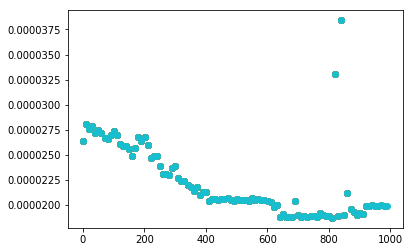

In [56]:
plotTC(euler_limit,1,1000,10,100)

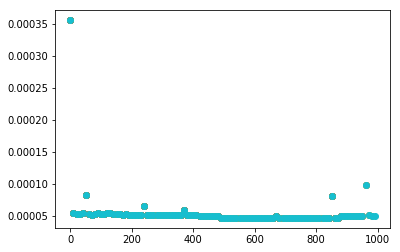

In [57]:
plotTC(euler_approx,1,1000,10,100)

### Problem 4:  Testing Properties of an Integer (3 points)

### 4.1:
Write a function *is_power_of_2* that takes a positive integer as its only argument
and returns a Boolean indicating whether or not the input is a power of 2. You
may assume that the input is a positive integer. You may not use the built-in
math.sqrt function in your solution. You should need only the division and modulus
(%) operations

In [4]:
def is_power_of_2(n):
    if n == 1:return True
    if n == 2:
        return True
    elif n%2 != 0:
        return False
    else:
        return is_power_of_2(n//2)

In [5]:
is_power_of_2(1)

True

### 4.2:
Generalize your previous solution to a function *is_power* that takes two positive integers as its arguments, b and n, in that order, and returns a Boolean. *is_power*(b,n)
should return True if n is a power of b and False otherwise.

In [7]:
def is_power(b,n):
    if n == 1:return True
    if n == b:
        return True
    elif n%b != 0:
        return False
    else:
        return is_power(n//b,b)

In [12]:
is_power(0,0)

True

In [11]:
is_power(12,144)

True

In [84]:
is_power(11,1)

True